# Interpolación de Lagrange uni-dimensional

## Introducción

El problema de interpolación o de predecir funciones a partir de un número determinado de datos representativos de la función aparece con bastante frecuencia en la interpretación de datos experimentales. De otro lado, las técnicas de aproximación de funciones por medio de métodos de interpolación son la base para la formulación de los métodos mas importantes de la mecánica computacional como lo son los elementos finitos y los elementos de frontera. En este NOtebook se discutirán algunos aspectos básicos y fundamentales de la teoría de interpolación. El notebook se describe en términos del desarrollo completo de un problema ejemplo incluyendo su implementación en Python. **Al completar este notebook usted debería estar en la capacidad de:**

* Reconocer el problema de interpolación de funciones como uno de aproximación de una función desconocida en términos de valores discretos de la misma función.

* Identificar las propiedades fundamentales de los polinomios de interpolación de Lagrange.

* Usar polinomios de interpolación de Lagrange para proponer aproximaciones a una función dado un conjunto de $N$ valores conocidos de la misma.

* Reconocer la diferencia entre variables primarias y secundarias en un esquema de interpolación.

## Interpolación de Lagrange
El problema de interpolación consiste en la determinación del valor de una función $f(x)$ en un punto arbitrario $x \in \left[ {{x_1},{x_n}} \right]$, dados valores conocidos de la función al interior de un dominio de solución. De acuerdo con el teorema de interpolación de Lagrange la aproximación $\hat f(x)$ a la función $f(x)$ se construye como:

\begin{equation}
\hat f(x)={L^I}(x)f^I
\end{equation}

donde $L^I$ es el $I-$esimo Polinomio de orden $n-1$ y $f^1, f^2,,...,f^n$ son los $n$ valores conocidos de la función. El $I-$esimo polinmio de Lagrange se calcula siguiendo la siguiente expresión recursiva:

\begin{equation}
{L^I}(x)=\prod_{J=1, J \ne I}^{n}{\frac{{\left( {x - {x^J}} \right)}}{{\left( {{x^I} - {x^J}} \right)}}} 
\end{equation}

### Primera derivada
En varios problemas de ingeniería es necesario usar tecnicas de ingerpolación para encontrar valores de las derivadas de la variable primaria o principal. Por ejemplo en problemas de mecánica de sólidos y teoría de elasticidad, en los cuales la variable primaria es el campo de desplazamientos, uno puede estar interesado en determinar las deformaciones unitarias las cuales son derivadas espaciales de los desplazamietos. Considerando que solo se dispone de valores discretos de los desplazamientos se tiene que las derivadas que se requieren se pueden encontrar usando estos valores discretos. Lo anterior equivale a derivar $\hat f(x)$ directamente como sigue:


\begin{equation}
\frac{d\hat f}{dx}=\frac{dL^I(x)}{dx}f^I
\end{equation}

Haciendo

$${B^I}(x) = \frac{dL^I(x)}{dx}$$

podemos escribir el esquema de interpolación como:

\begin{equation}
\frac{d\hat f}{dx}={B^I}(x)f^I.
\end{equation}




## Ejemplo
Formule un esquema de interpolación para encontrar un valore de la función

 \begin{equation}
f(x)=x^3+4x^2-10
\end{equation}

en un punto arbitrario $x$ en el intervalo $\left[ {{-1},{1}} \right]$ asumiendo que se conoce el valor exacto de la función en los puntos $x=-1.0$, $x=+1.0$ and $x=0.0.$

En este ejemplo se conoce la función y aparentemente no tiene mucho sentido buscar una aproximación de la misma resolviendo un problema de interpolación. Sin embargo es conveniente seleccionar una función conocida para poder asimilar el problema numerico y sus limitaciones. En este contexto asumiremos que en una aplicación real conocemos los valores de la función en un conjunto de puntos $x=-1.0$, $x=+1.0$ and $x=0.0$ los cuales se denominan puntos nodales o simplemente `nodes`.

El proceso de interpolación involucra 2 pasos fundamentales: 

* (i) Determinar los polinomios de interpolación $L^I$ usando la productoria.

* (ii) Usar superposición líneal para construir el polinomio interpolante o la aproximación a la función $\hat f(x)$.

(i) Considerando que tenemos 3 puntos `nodales` necesitamos generar 3 polinomios de interpolación de segundo orden, cada uno de ellos asociado a cada punto nodal. Rotulemos los `nudos` como $x^0 = -1.0$, $x^1 = +1.0$ y $x^2 = 0.0$. De acuerdo con esta denominación ${L^0}(x)$, ${L^1}(x)$ y ${L^2}(x)$ serán los polinomios de interpolación de segundo orden asociados a los puntos nodales $x^0 = -1.0$, $x^1 = +1.0$ y $x^2 = 0.0.$ respectivamente. Usando la formula de la productoria tenemos:

$$L^0(x)=\frac{(x-x^1)(x-x^2)}{(x^0-x^1)(x^0-x^2)}\equiv\frac12(x-1.0)x$$

$$L^1(x)=\frac{(x-x^0)(x-x^2)}{(x^1-x^0)(x^1-x^2)}\equiv\frac12(x+1.0)x$$

$$L^2(x)=\frac{(x-x^0)(x-x^1)}{(x^2-x^0)(x^2-x^1)}\equiv-(x+1.0)(x-1.0).$$

(ii) Para llegar a la aproximación final de la función usamos la superposición líneal:

\begin{equation}
\hat f(x)={L^0}(x)f^0+{L^1}(x)f^1+{L^2}(x)f^2
\end{equation}


**Preguntas:**

**Verificar que los polinomios de interpolación ${L^0}(x)$, ${L^1}(x)$ y ${L^2}(x)$ satisfacen la propiedad $L^I(x^J)=\delta^{IJ}$** 

**Si la condición $L^I(x^J)=\delta^{IJ}$ no se satisface por una de las funciones de interpolación encontradas cual será el efecto resultante en la aproximación de la función?**


### Algunas notas de ineteres
* En el método de los elementos finitos es común denominar a los polinomios de interpolación como `funciones de forma`. 

* El dominio de calculo es el intervalo de tamaño 2 comprendido entre $x=-1.0$ y $x=+1.0$. Como se discutirá mas adelante, por facilidades en la programación en la implementación de métodos de elementos finitos los dominios de tamaño diferente son transformados al dominio de tamaño 2.

## Solución en Python

En los siguientes bloques de código mostramos el paso a paso en la construcción del polinomio de interpolación final $f(x)$ usando Python. Para seguir el Notebook se recomienda que de manera simultanea se implementen los bloques de código en un script independiente o que añada comentarios a las instrucciones mas relevantes.

### Paso 1:Importación de modulos
En la escritura de scripts en Python es necesario importar `modulos` o librerias que contienen funciones de Python predefinidas. En este caso importaremos los `modulos`:

* `numpy` el cual es una libreria de funciones para realizar operaciones con matrices analogo a MATLAB.
* `matplotlib` el cual es una libreria de graficación.
* `scipy` el cual es una libreraía fundamental para computación científica.
* `sympy` el cual es una librería para realizar matematicas simbolicas.

Pyhton importa los modulos usando la palabra reservada `import` seguida del nombre del modulo y un pre-fijo para ser usado en referencias posteriores a las funciones contenidas en ese modulo.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

### Paso 2: Definición de una función para determinar los polinomios de interpolaci´pn de Lagrange

En un programa de computador una `funcion` (o también llamada `subrutina`) es un bloque de código que realiza una tarea dada múltiples veces dentro de un programa o probablemente en diferentes programas. En Python estas funciones se definen por medio de la palabra clave `def` seguida del nombre dado a la función.

Conjuntamente con el nombre, encerrado entre paréntesis, la definición de la función debe incluir también una lista de paramétros (o argumentos) a ser usados por la función cuando esta realice tareas especificas.

En el ejemplo definiremos una función de Pyhton para generar el polinomio de Lagrange usando la productoria definida previamente. Le daremos a esta función el nombre `LagrangPoly`. Sus paramétros de entrada serán la variable independiente $x$ a ser usada en el polinomio; el orden del polinomio definido por `order`; y el punto `i` asociado al polinomio. La función será usada posteriormente desde el programa principal.

In [2]:
def LagrangPoly(x,order,i,xi=None): 
    if xi==None:
        xi=sym.symbols('x:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

Alternativamente a la definción de una función usando la palabre clave `def` Python también permite la definición de funciones en el sentido del Calculo, es decir definición de relaciones que permiten  transformar escalares y/o vectors en otros escalares y/o vectores. Esto es posible a través de la opción `lambda`. En este ejemplo usaremos la opción `lambda` para crear la función:

\begin{equation}
f(x)=x^3+4x^2-10.
\end{equation}


**Preguntas:**

**Use una terminal o un script independiente para probar el uso de la opción `lambda` en la definición de una función. Intente con diferentes funciones.**

In [3]:
fx = lambda x: x**3+4.0*x**2-10.0

Una vez creada la función $f(x)$ usando la opción `lambda` pasamos a definir un conjunto de puntos de evaluación. El numero de puntos se define por medio de la variable `npts` y usamos la función `linspace` del modulo `numpy` para crear una distribución equidistante de puntos entre $x = -1.0$ y $x = +1.0.$ Simultaneamente el arreglo vacio `yy` almacenará los valores de la función en los puntos almacenados en `xx`.

Note que Python inicia desde la posición 0 el conteo de elementos en arreglos y otras estructuras de datos, de manera que empezamos a contar desde cero para mantener la consistencia con la implementación.

In [4]:
npts = 200                     
yy = np.zeros((npts))          
xx = np.linspace(-1, 1, npts)  

Con la función ahora disponible podemos calcular los valores (conocidos) listos para ser usados en el esquema de interpolación. Estos valores se almacenarán en el arreglo `fd()`. Para calcular cada valor de la función usamos el comando (ya disponible) `fx` correspondiente al nombre que usamos en la declaración de la función usando la opción `lambda`.

**Preguntas:**

**Intente usar nombres diferentes en la definición de la función usando la opción `lambda` y ensaye si su código aún funciona.**

In [5]:
fd = np.array([fx(-1.0), fx(1.0) ,fx(0.0)]) 

Ahora evalue la función en los `npts` puntos y grafique la misma:

<IPython.core.display.Javascript object>


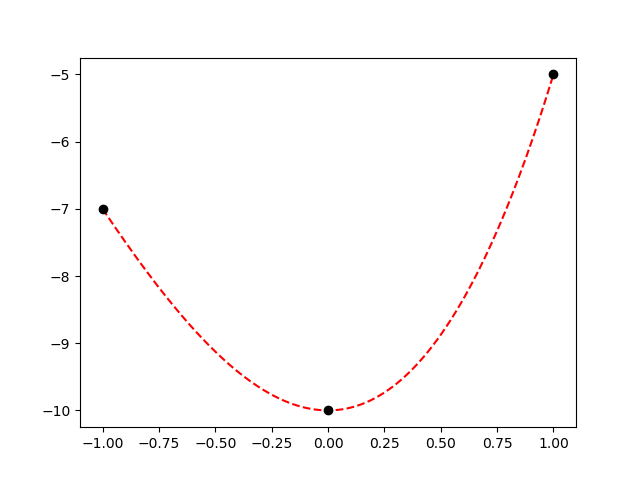

In [6]:
plt.figure(0)                    
yy = fx(xx)                             
plt.plot(xx , yy ,'r--')         
plt.plot([-1 , 1 , 0], fd, 'ko') 

### Paso 3: Encontrando los polinomios de interpolación de Lagrange.

Calculemos ahora los polinomios de Lagrange invocando la función `LagrangPoly()`. Crearemos un arreglo dinámico al que llamaremos `pol` y cada que determinemos un nuevo polinomio lo adicionaremos (dinamicamente) al arreglo usando para ello el método `append` de Python. En ese momento los polinomios almacenados en el arreglo dinámico pol[] existirán en notación simbolica (como si estuvieramos resolviendo el problema a mano) y estarán listos para ser evaluados en valores especificos de $x$.

In [7]:
x= sym.symbols('x')                                       
pol = []                                                
pol.append(sym.simplify(LagrangPoly(x, 2, 0, [-1,1,0])))  
pol.append(sym.simplify(LagrangPoly(x, 2, 1, [-1,1,0])))
pol.append(sym.simplify(LagrangPoly(x, 2, 2, [-1,1,0])))
print(pol)

[x*(x - 1)/2, x*(x + 1)/2, -x**2 + 1]


**Preguntas:**

**Grafique los 3 polinomios de Lagrange de orden 2 y verifique que satisfacen la propiedad $L^I(x^J)=\delta^{IJ}$.**

**Adicione mas puntos al dominio de interpolación y grafique los polinomios resultantes. ¿ Cual es el efecto en los polinomios?**

El método `subs` del modulo `sympy` substituye el valor de la variable independiente $x$ por el valor almacenado en $xx[i]$.

<IPython.core.display.Javascript object>


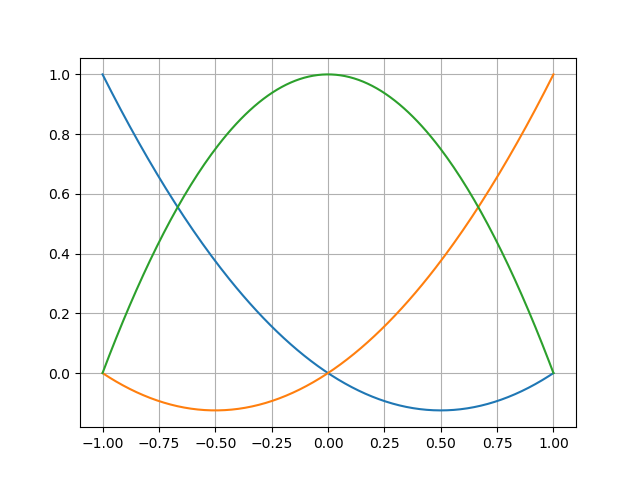

In [8]:
plt.figure(1)                               
plt.grid()                                  
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])   
    plt.plot(xx, yy)

### Paso 4: Encontrando el polinomio de interpolación para aprximar la funciónn  $f(x).$

Construyamos ahora el polinomio de aproximación completo $\hat f(x)$ de acuerdo con la superposición líneal;

$$\hat f(x) = {L^0}(x)f({x^0}) + {L^1}(x)f({x^1}) +  {L^2}(x)f({x^2})$$


y utilizando el arreglo (ya disponible) `pol[]` que almacena los 3 polinomios generados. Solo para efectos de ilustrar primero los imprimimos. La versión evaluada de $\hat f(x)$ será almacenada en el arreglo `yy[i]`.

In [9]:
print(pol[0]*fd[0]+pol[1]*fd[1]+pol[2]*fd[2])

10.0*x**2 - 3.5*x*(x - 1) - 2.5*x*(x + 1) - 10.0


<IPython.core.display.Javascript object>


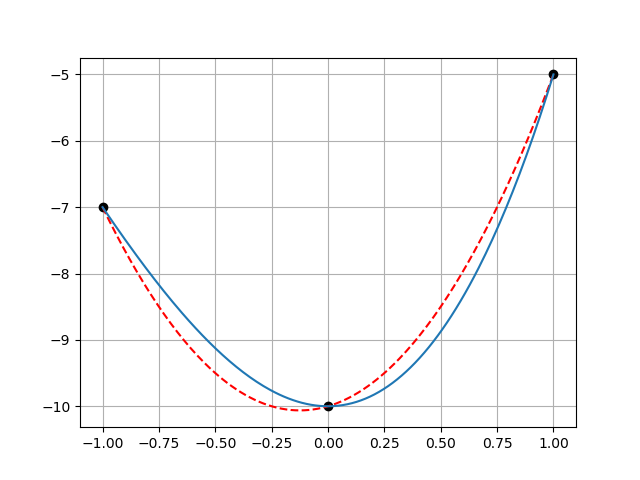

In [10]:
plt.figure(2)                                                                      
plt.grid()
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])]) \
            + fd[2]*pol[2].subs([(x, xx[i])])

zz = fx(xx)
plt.plot([-1, 1, 0], fd, 'ko')
plt.plot(xx, yy , 'r--')
plt.plot(xx, zz)

Note que debido a la diferencia en orden entre la aproximación $\hat f(x)$ y la funcion $f(x)$  el polinomio de interpolación no coincide completamente con la función aunque si reproduce los valores correctos en los puntos nodles.

**Preguntas:**

**Como podemos mejorar la aproximación $\hat f (x)$  a la función $f(x)$ ?**

### Paso 5: Encontrando las derivadas
Usemos la opción `lambda` una vez mas para definir una nueva función `fdx`correspondiente a la primera derivada:

$$f'(x)=3x^2+8x.$$

Las derivadas en los puntos nodales se almacenarán en el arreglo `fc()`

In [11]:
fdx = lambda x: 3*x**2+8.0*x
fc = np.array([fdx(-1.0), fdx(1.0) ,fdx(0.0)])

Las derivadas interpoladas se calculan entonces de acuerdo con


\begin{equation}
\hat f'(x) = \frac{dL^0(x)}{dx} f^0 + \frac{dL^1(x)}{dx}(x) f^1 + \frac{dL^2(x)}{dx} f^2
\end{equation}

[x - 1/2, x + 1/2, -2*x]
8.0*x + 1.0


<IPython.core.display.Javascript object>


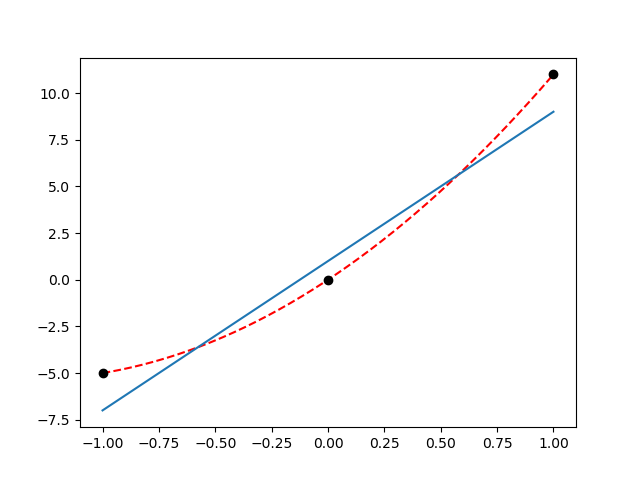

In [12]:
dpol = []
dpol.append(sym.diff(pol[0],x))     
dpol.append(sym.diff(pol[1],x))
dpol.append(sym.diff(pol[2],x))
print(dpol)
print(dpol[0]*fd[0]+dpol[1]*fd[1]+dpol[2]*fd[2])
#
plt.figure(3)
yy= fdx(xx)
plt.plot(xx, yy ,'r--')
plt.plot([-1, 1, 0], fc, 'ko')
#
for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1]*dpol[1].subs([(x, xx[i])])+ fd[2]*dpol[2].subs([(x, xx[i])]) 
plt.plot(xx, yy)

### Glosario de términos

**Formula de productoria:** Expresión usada para calcular los polinomios de interpolación de Lagrange.

**Función de forma:** Nombre dado a un polinomio de interpolación en el contexto del método de los elementos finitos.

**Punto nodal:** (También nudo). Nombre dado a los puntos especificos donde se conoce el valor de una función y usado en la construcción del esquema de interpolación.

**Subrutina:** Bloque de código independiente que realiza una tarea de computo determinada dentro de un programa principal.

**Matriz de interpolación:** Arreglo uni-dimensional o bi-dimensional que almacena las funciones de forma en un esquema de interpolación determinado.

### Class activity
El proposito de esta actividad es familiarizar al estudiante con el uso del método de interpolación de Lagrange en un contexto particular de la ingeniería, como el método de los elementos finitos. El método de MEFs utiliza dominios de interpolación de tamaño constante (llamados `elementos`) permitiendo el uso de funciones de interpolación constantes y al mismo tiempo favoreciendo la automatización en programas de computador. En una aplicación típica de elementos finitos los valores nodales de una función (por ejemplo el desplazamiento) son determinados tras resolver un sistema de ecuaciones algebraicas. Estos valores nodales son posteriormente usados, no solo para encontrar el desplazamiento a lo largo de todo el dominio del problema, sino también para realizar calculos posteriores y obtener información adicional del problema físico.

**Siga los pasos que se indican a continuación para implementar, en un notebook independiente, un esquema de interpolación típico del método de elementos finitos. El esquema de interpolación resultante será el correspondiente a un solo elemento**

* Asumiendo que un domionio de interpolación constante se define como $x \in \left[ {{-1.0},{+1.0}} \right]$ con puntos nodales correspondientes a $x^0 = -1.0$, $x^1 = +1.0$, $x^2 = 0.0$, $x^3 = -0.25$ y $x^4 = +0.25$ use la función `LagrangPoly()` para generar las funciones de interpolación asociadas a estos 5 puntos nodales. Presente los polinomios resultantes en una grafica.

* Utilice las funciones de interpolación encontradas en el paso anterior, para definir una matriz $\left[N(x)\right]$, que se denomnará en lo que sigue la `Matriz de interpolación`, de manera que la operación de interpolar se pueda realizar usando operaciones matriciales como:

$$\hat f(x) = \left[N(x)\right]\left\{F\right\}$$

y en la cual $F$ es un vector que almacena los valores nodales de la función. En su Notebook imprima la versión simbolica de la matriz de interpolación.

* En su Notebook grafique una función $f(x)$ (representando el desplazamiento de una barra) y su v ersión aproximada $\hat f(x)$  usando el esquema matricial desarrollado en el numeral anterior. El código también debe graficar la primera derivada de la función.

* Para realizar la interpolación en el Notebook programe una función o subrutina de Python que reciva como parametros de entrada las coordinadas $x$ donde se desea calcular una aproximación de la función y el vector de valores nodales de la función de desplazamientos y entregue después de su ejecución el valor interpolado de la función.

In [13]:
# This bit of code is a class added to make the title nice  (thanks to @lorenABarba )
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()

(c) Juan Gomez, Nicolas Guarín 2019. Este material es parte del curso Modelación Computacional en el programa de Ingeiería Civil de la Universidad EAFIT.